In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
#import zipfile

In [4]:
zip_file_path = r'D:\Users\vumis\Desktop\Tuks Files\INF 791\Data Sets\Feature Sets.zip'
extract_folder_path = r'D:\Users\vumis\Desktop\Tuks Files\INF 791\Data Sets\Extracted Set'
output_path = r'D:\Users\vumis\Desktop\Tuks Files\INF 791\Data Sets\Combined Set\Combined.csv' 

In [6]:
# Create the directory if it doesn't exist
os.makedirs(extract_folder_path, exist_ok=True)

# Extract the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref: 
#    zip_ref.extractall(extract_folder_path)

In [7]:
# List all CSV files in the extracted folder
all_files = [os.path.join(extract_folder_path, f) for f in os.listdir(extract_folder_path) if f.endswith('.csv')]

# Initialize an empty list to store dataframes
df_list = []

for file in all_files:
    # Read the csv file
    df = pd.read_csv(file)
    
    # Append the dataframe to the list
    df_list.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(df_list, ignore_index=True)


In [8]:
combined_df.drop_duplicates(inplace=True)

In [9]:
combined_df.to_csv(output_path, index=False)

In [17]:
pd.set_option("expand_frame_repr", False)
df= pd.read_csv('D:/Users/vumis/Desktop/Tuks Files/INF 791/Data Sets/Combined Set/Combined.csv', sep=';', encoding='utf-8', on_bad_lines='skip', quotechar='"')
df2 = pd.DataFrame(df)
df2

,Nickname,Defender Score,Attacker Score,Time (sec),Winner,Level,Unnamed: 6,Unnamed: 7
0,u20444550,8.0,5.0,138.0,Defender,Expert,NaN,NaN
1,u20444550,8.0,5.0,137.0,Defender,Expert,NaN,NaN
2,u20444550,10.0,3.0,118.0,Defender,Expert,NaN,NaN
3,u20444550,8.0,5.0,112.0,Defender,Expert,NaN,NaN
4,u20444550,9.0,4.0,107.0,Defender,Expert,NaN,NaN
...,...,...,...,...,...,...,...,...
1243,Vader,5.0,8.0,303.0,Attacker,Beginner,NaN,NaN
1244,Sith,7.0,6.0,288.0,Defender,Beginner,NaN,NaN
1245,Lulamela,5.0,8.0,287.0,Attacker,Beginner,NaN,NaN
1246,Lu,6.0,7.0,283.0,Attacker,Beginner,NaN,NaN


In [18]:
# Data Cleaning 
# Drop columns with null values
df2 = df2.drop('Unnamed: 6', axis=1)
df2 = df2.drop('Unnamed: 7', axis=1)

df2.rename(columns = {'Defender Score':'Defender_Score', 'Attacker Score':'Attacker_Score','Time (sec)':'Time'}, inplace = True)
df2

,Nickname,Defender_Score,Attacker_Score,Time,Winner,Level
0,u20444550,8.0,5.0,138.0,Defender,Expert
1,u20444550,8.0,5.0,137.0,Defender,Expert
2,u20444550,10.0,3.0,118.0,Defender,Expert
3,u20444550,8.0,5.0,112.0,Defender,Expert
4,u20444550,9.0,4.0,107.0,Defender,Expert
...,...,...,...,...,...,...
1243,Vader,5.0,8.0,303.0,Attacker,Beginner
1244,Sith,7.0,6.0,288.0,Defender,Beginner
1245,Lulamela,5.0,8.0,287.0,Attacker,Beginner
1246,Lu,6.0,7.0,283.0,Attacker,Beginner


In [19]:
# Data Cleaning 
# Drop duplicates
df2 = df2.drop_duplicates()

# Print the table
df2

,Nickname,Defender_Score,Attacker_Score,Time,Winner,Level
0,u20444550,8.0,5.0,138.0,Defender,Expert
1,u20444550,8.0,5.0,137.0,Defender,Expert
2,u20444550,10.0,3.0,118.0,Defender,Expert
3,u20444550,8.0,5.0,112.0,Defender,Expert
4,u20444550,9.0,4.0,107.0,Defender,Expert
...,...,...,...,...,...,...
1243,Vader,5.0,8.0,303.0,Attacker,Beginner
1244,Sith,7.0,6.0,288.0,Defender,Beginner
1245,Lulamela,5.0,8.0,287.0,Attacker,Beginner
1246,Lu,6.0,7.0,283.0,Attacker,Beginner


In [20]:
# Data Cleaning 
# Remove null rows
df2 = df2.dropna()  
df2

,Nickname,Defender_Score,Attacker_Score,Time,Winner,Level
0,u20444550,8.0,5.0,138.0,Defender,Expert
1,u20444550,8.0,5.0,137.0,Defender,Expert
2,u20444550,10.0,3.0,118.0,Defender,Expert
3,u20444550,8.0,5.0,112.0,Defender,Expert
4,u20444550,9.0,4.0,107.0,Defender,Expert
...,...,...,...,...,...,...
1243,Vader,5.0,8.0,303.0,Attacker,Beginner
1244,Sith,7.0,6.0,288.0,Defender,Beginner
1245,Lulamela,5.0,8.0,287.0,Attacker,Beginner
1246,Lu,6.0,7.0,283.0,Attacker,Beginner


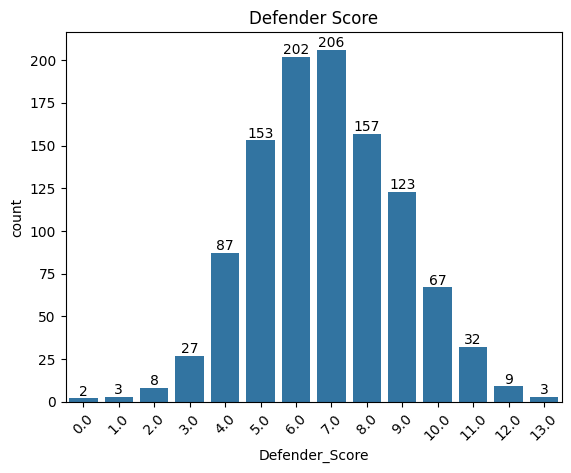

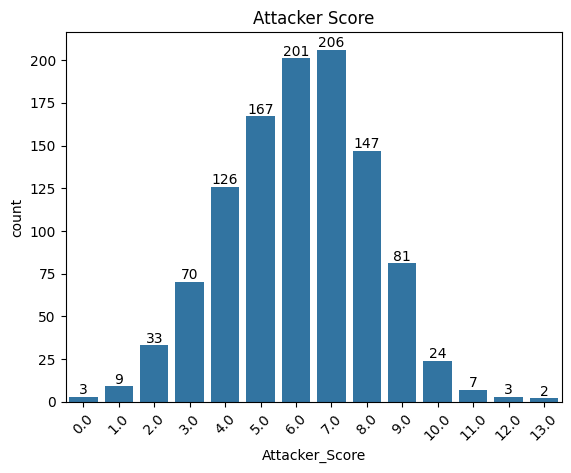

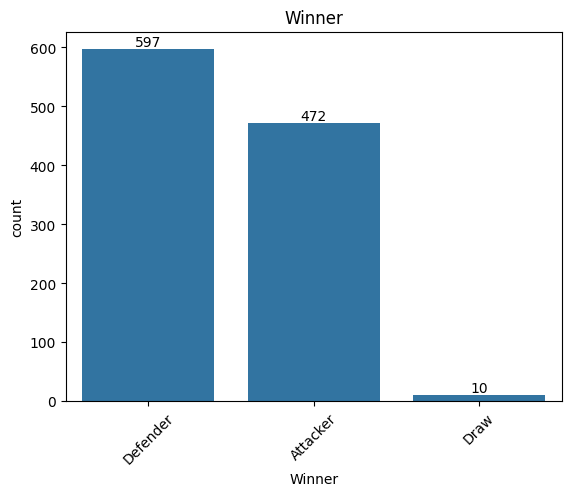

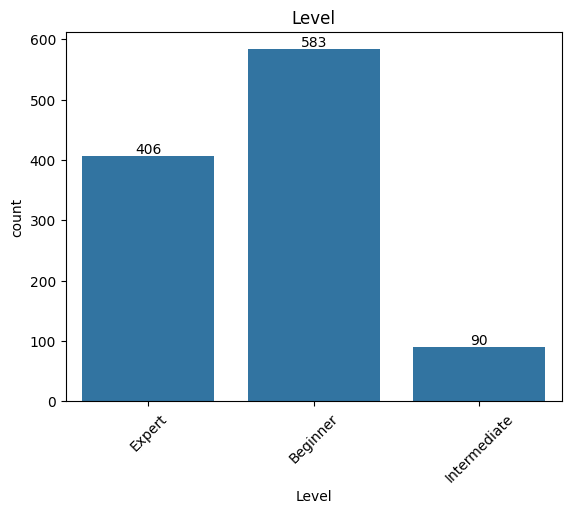

In [23]:
# Data Visualisation

# Defender Score

ax = sns.countplot(x=df2['Defender_Score'], data=df2)
plt.title('Defender Score')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#Attacker Score

ax = sns.countplot(x=df2['Attacker_Score'], data=df2)
plt.title('Attacker Score')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Winner

ax = sns.countplot(x=df2['Winner'], data=df2)
plt.title('Winner')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Level

ax = sns.countplot(x=df2['Level'], data=df2)
plt.title('Level')

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()




#Time (sec) needs a proper graph, this one is too squashed, has many numbers

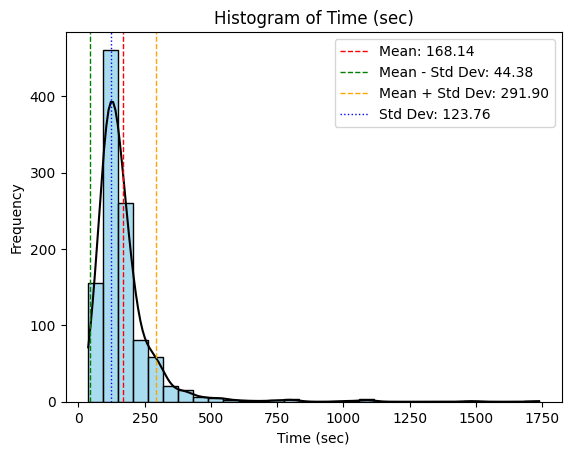

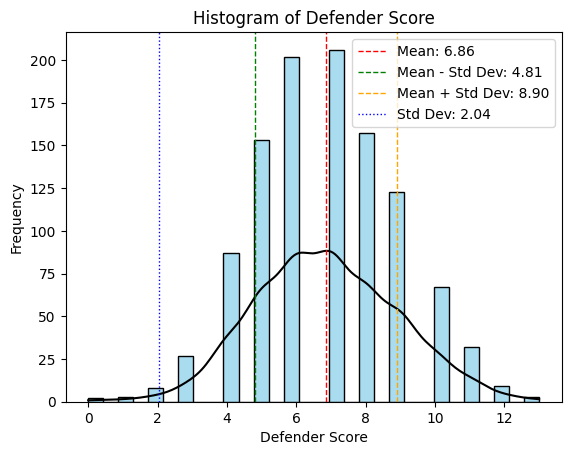

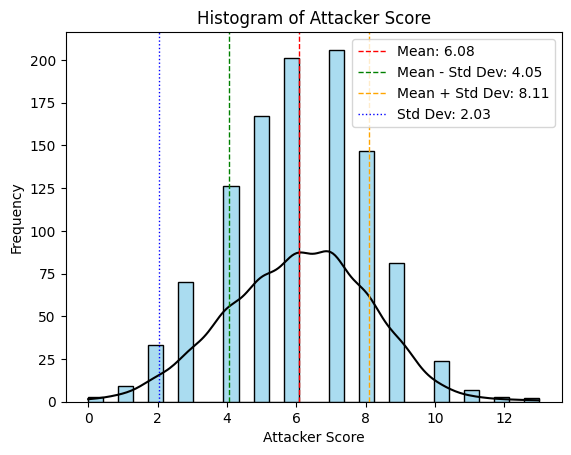

In [62]:
# Histograms
#Time (sec) 

feature = 'Time (sec)'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()


# Defender Score
feature = 'Defender Score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Attacker Score
feature = 'Attacker Score'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()


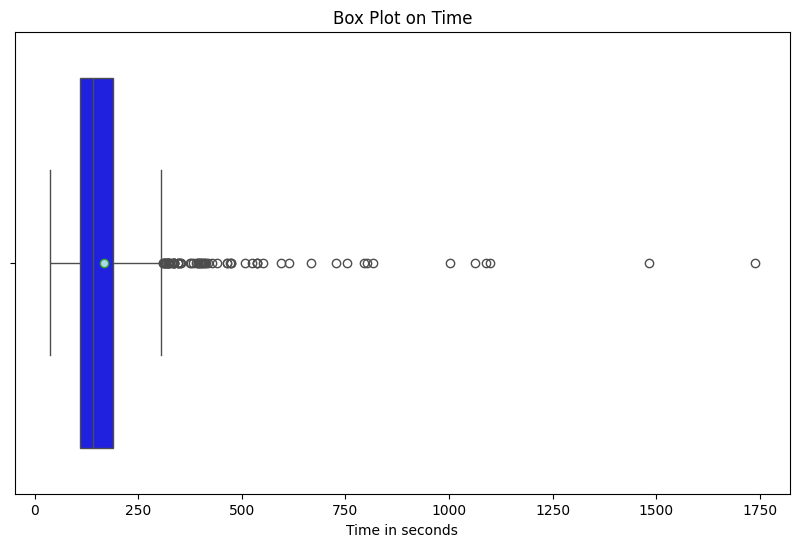

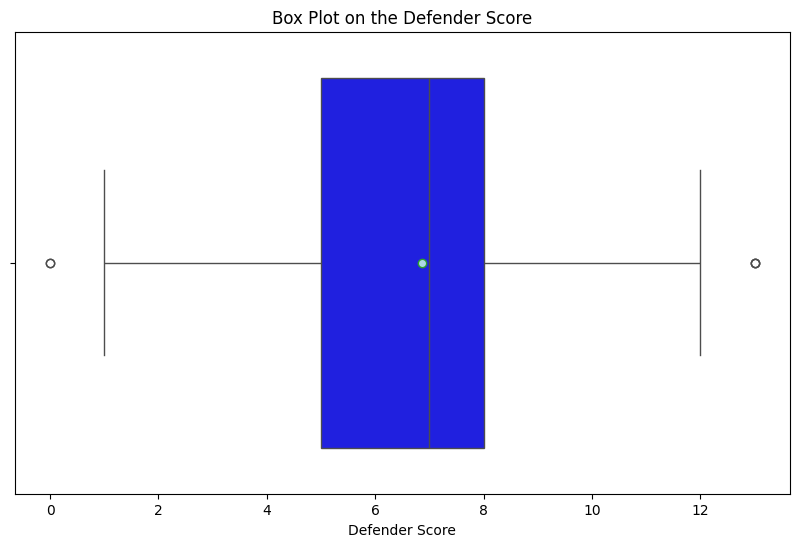

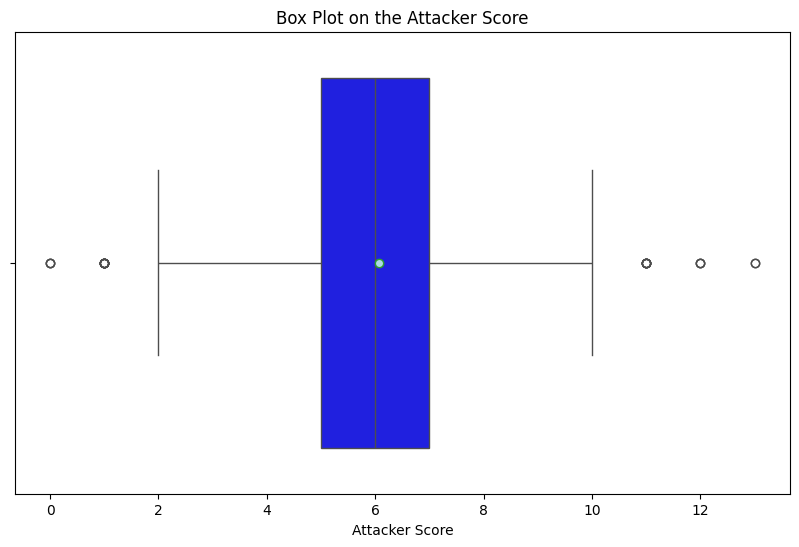

In [63]:
# Additional Box plots 

time_mean_color = 'lightblue'

# Create a box plot with means shown in the custom color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', data=df, color='blue', showmeans=True, meanprops={"marker":"o", "markerfacecolor": time_mean_color})  # Set showmeans=True and customize meanprops
plt.title('Box Plot on Time')
plt.xlabel('Time in seconds')
plt.show()


defender_mean_color = 'lightblue'

# Create a box plot with means shown in the custom color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Defender_Score', data=df, color='blue', showmeans=True, meanprops={"marker":"o", "markerfacecolor": defender_mean_color})  # Set showmeans=True and customize meanprops
plt.title('Box Plot on the Defender Score')
plt.xlabel('Defender Score')
plt.show()


attacker_mean_color = 'lightblue'

# Create a box plot with means shown in the custom color
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attacker_Score', data=df, color='blue', showmeans=True, meanprops={"marker":"o", "markerfacecolor": attacker_mean_color})  # Set showmeans=True and customize meanprops
plt.title('Box Plot on the Attacker Score')
plt.xlabel('Attacker Score')
plt.show()


In [2]:
# transformation of categorical to numeric

#First testing Defender and Winner
pd.set_option("expand_frame_repr", False)
df= pd.read_csv('D:/Users/vumis/Desktop/Tuks Files/INF 791/Data Sets/Combined Set/Combined.csv', sep=';', encoding='utf-8', on_bad_lines='skip', quotechar='"')
df2 = pd.DataFrame(df)
df2 = df2.drop('Unnamed: 6', axis=1)
df2 = df2.drop('Unnamed: 7', axis=1)
df2 = df2.drop('Nickname', axis=1)
#df2 = df2.drop('Attacker_Score', axis=1)
#df2 = df2.drop('Defender_Score', axis=1)
#df2 = df2.drop('Time', axis=1)
#df2 = df2.drop('Level', axis=1)
df2 = df2.drop_duplicates()
df2 = df2.dropna() 
df2.rename(columns = {'Defender Score':'Defender_Score', 'Attacker Score':'Attacker_Score','Time (sec)':'Time'}, inplace = True)


from sklearn import preprocessing 
lab_encoder = preprocessing.LabelEncoder()
df2['Winner'] = lab_encoder.fit_transform(df2['Winner'])
df2['Level'] = lab_encoder.fit_transform(df2['Level'])
# Nickname yona?? 
df2

,Defender_Score,Attacker_Score,Time,Winner,Level
0,8.0,5.0,138.0,1,1
1,8.0,5.0,137.0,1,1
2,10.0,3.0,118.0,1,1
3,8.0,5.0,112.0,1,1
4,9.0,4.0,107.0,1,1
...,...,...,...,...,...
1241,6.0,7.0,310.0,0,0
1243,5.0,8.0,303.0,0,0
1244,7.0,6.0,288.0,1,0
1245,5.0,8.0,287.0,0,0


In [3]:
# Creating datasets fro the machine learning
from sklearn.model_selection import train_test_split  # library for machine learning models 

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [4]:
X_train
X_test
y_train
y_test

863     0
215     0
79      1
208     1
364     1
       ..
382     0
257     1
593     0
1172    0
720     0
Name: Level, Length: 165, dtype: int32

In [5]:
# Import Machone Leaning tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [6]:
# Machine Learning Techniques

# Random Forest 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)

Accuracy of Random Forest :  1.0
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        11

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Confusion Matrix of Random Forest : 
 [[103   0   0]
 [  0  51   0]
 [  0   0  11]]


In [7]:
# Support Vector Machine (SVM)
svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)

Accuracy of SVM :  0.909
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       109
           1       0.96      0.89      0.92        55
           2       0.00      0.00      0.00         1

    accuracy                           0.91       165
   macro avg       0.65      0.61      0.63       165
weighted avg       0.97      0.91      0.94       165

Confusion Matrix of SVM :
 [[101   2   6]
 [  1  49   5]
 [  1   0   0]]


Accuracy of Naive Bayes :  0.952
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        96
           1       1.00      0.94      0.97        54
           2       0.91      0.67      0.77        15

    accuracy                           0.95       165
   macro avg       0.95      0.87      0.90       165
weighted avg       0.95      0.95      0.95       165

Confusion Matrix of Naive Bayes :
 [[96  0  0]
 [ 2 51  1]
 [ 5  0 10]]


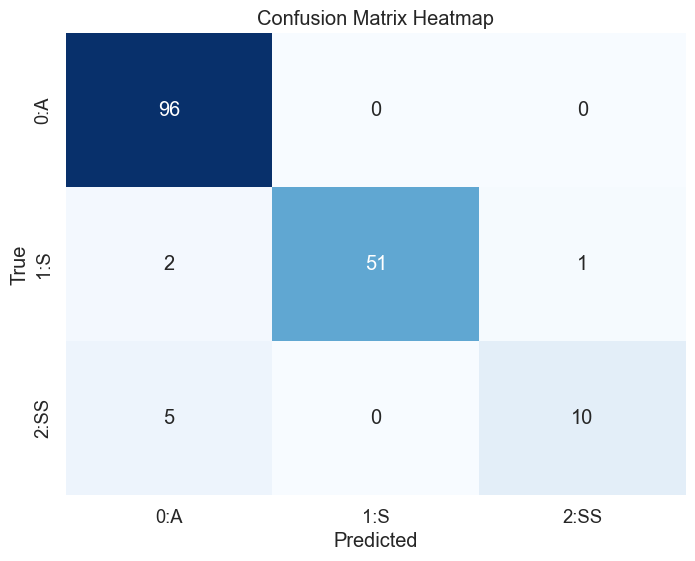

In [8]:
#Naive Bayes Algorithm

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

Accuracy of Naive Bayes :  0.952
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        96
           1       1.00      0.94      0.97        54
           2       0.91      0.67      0.77        15

    accuracy                           0.95       165
   macro avg       0.95      0.87      0.90       165
weighted avg       0.95      0.95      0.95       165

Confusion Matrix of Naive Bayes :
 [[96  0  0]
 [ 2 51  1]
 [ 5  0 10]]


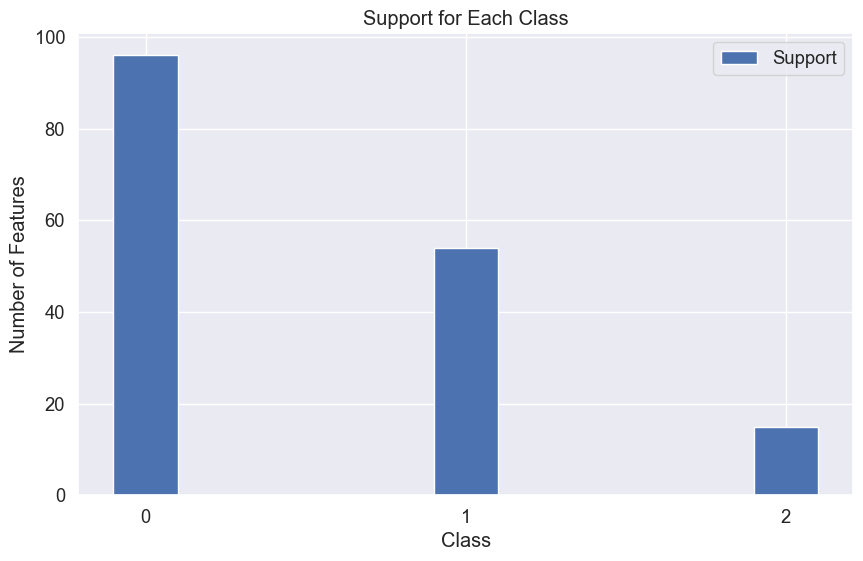

In [9]:
# Support what what 

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract support for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot support
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.2, label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()

In [10]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())

In [11]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)

Accuracy of Ensemble Model :  0.994
Confusion Matrix of Ensemble Model :  [[102   0   0]
 [  0  51   0]
 [  1   0  11]]
Classification Report of Ensemble Model :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       102
           1       1.00      1.00      1.00        51
           2       1.00      0.92      0.96        12

    accuracy                           0.99       165
   macro avg       1.00      0.97      0.98       165
weighted avg       0.99      0.99      0.99       165

Accuracy of Ensemble Model :  0.994
Confusion Matrix of Ensemble Model : 
 [[102   0   0]
 [  0  51   0]
 [  1   0  11]]
Classification Report of Ensemble Model :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       102
           1       1.00      1.00      1.00        51
           2       1.00      0.92      0.96        12

    accuracy                           0.99       165
   macro avg       1.

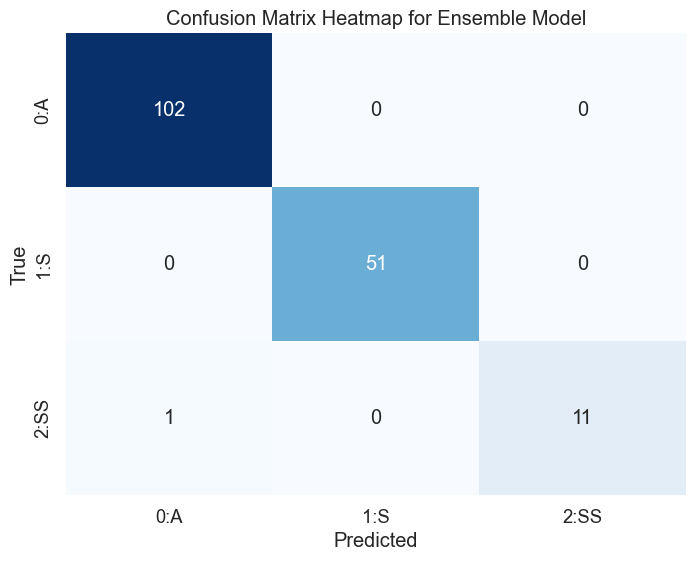

In [12]:
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : ', eb_matrix)
print('Classification Report of Ensemble Model :', eb_report)

# Assuming you already have pred and y_test defined for your Ensemble Model

eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : \n', eb_matrix)
print('Classification Report of Ensemble Model :\n', eb_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()

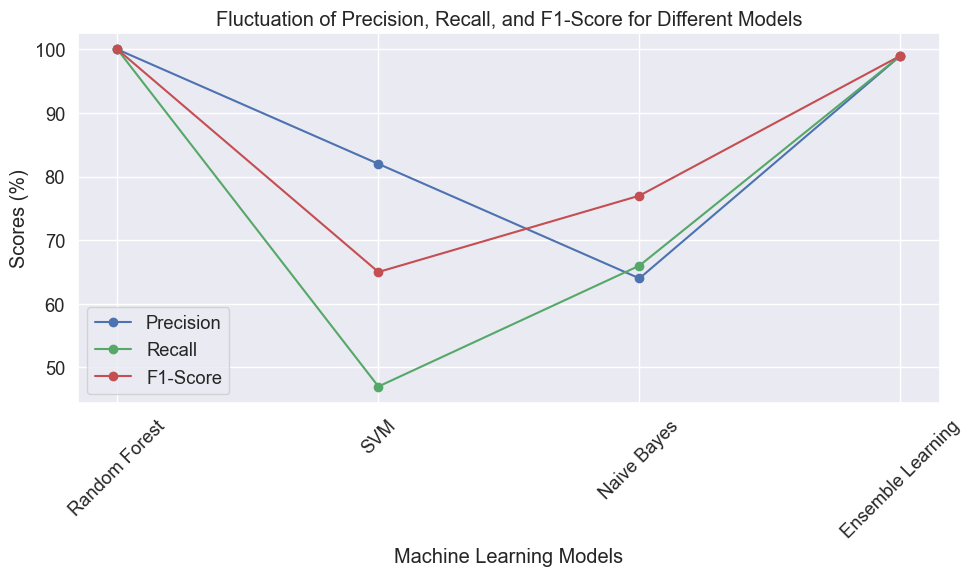

In [13]:
# UPDATE TO MY DATA!! 
#Plot the evaluation metrics of each model in one figure

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [100, 82, 64, 99]

# Recall scores
recall = [100, 47, 66, 99]

# F1-score scores
f1_score = [100, 65, 77, 99]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Fluctuation of Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

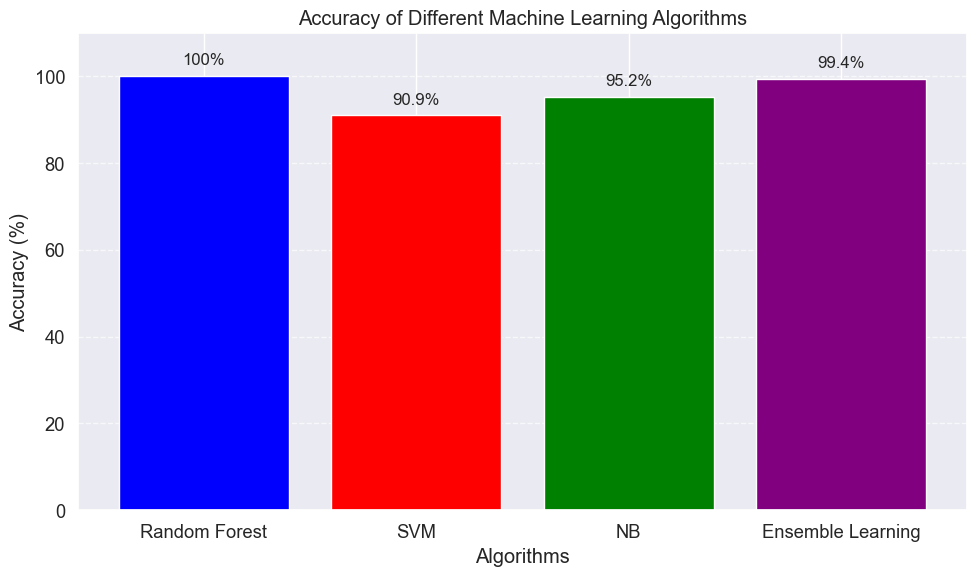

In [14]:
# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
accuracies = [100, 90.9, 95.2, 99.4]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Set the y-axis limit for better visualization
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()